# Clustering

The types of clustering models we will look at here are the following

<ul>
    <li>K-Means</li>
    <li>Agglomerative Clustering</li>
</ul>

The required dataset can be found at <b>datasets/clustering.csv</b>

### Data Import and Preprocessing

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6,6)

dataset = pd.read_csv('datasets/kmeans.csv')
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, -1].values

In [16]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### This datasets assigns spending_score for a set of a mall's customers

## 1. K-Means Clustering

##### 1. Choosing correct number of clusters: WCSS - Within Cluster Sum of Square 

In [17]:
from sklearn.cluster import KMeans

inertia_list = []
for i in range(1, 10):
    kmeans = KMeans(n_init=10, n_clusters=i, max_iter=300, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

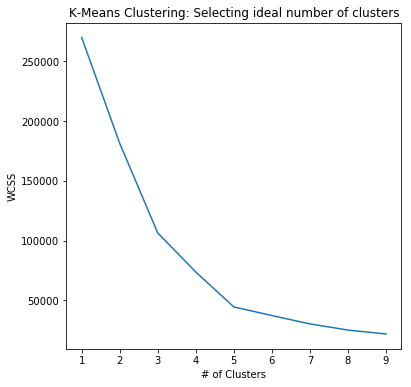

In [18]:
plt.plot(range(1,10), inertia_list)

plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering: Selecting ideal number of clusters')

plt.show()

##### Since the point of inflection seems to be at 5, 5 is the ideal number of clusters to be identified

In [24]:
kmeans_solution = KMeans(n_init=10, n_clusters=5, max_iter=300, init='k-means++', random_state=0)
y_pred = kmeans_solution.fit_predict(X)

In [25]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

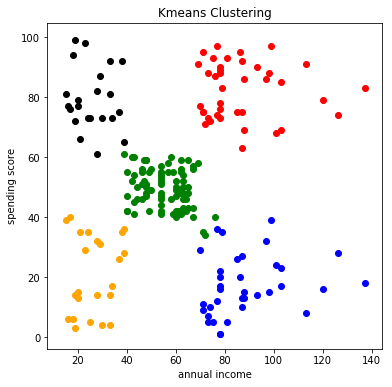

In [36]:
plt.scatter(X[y_pred==0][:, 0], X[y_pred==0][:, 1], color='blue')
plt.scatter(X[y_pred==1][:, 0], X[y_pred==1][:, 1], color='green')
plt.scatter(X[y_pred==2][:, 0], X[y_pred==2][:, 1], color='red')
plt.scatter(X[y_pred==3][:, 0], X[y_pred==3][:, 1], color='black')
plt.scatter(X[y_pred==4][:, 0], X[y_pred==4][:, 1], color='orange')
plt.title('Kmeans Clustering')
plt.xlabel('annual income')
plt.ylabel('spending score')

## 2. Agglomerative Clustering

In [37]:
import scipy.cluster.hierarchy as sch

#### dendogram for the dataset X

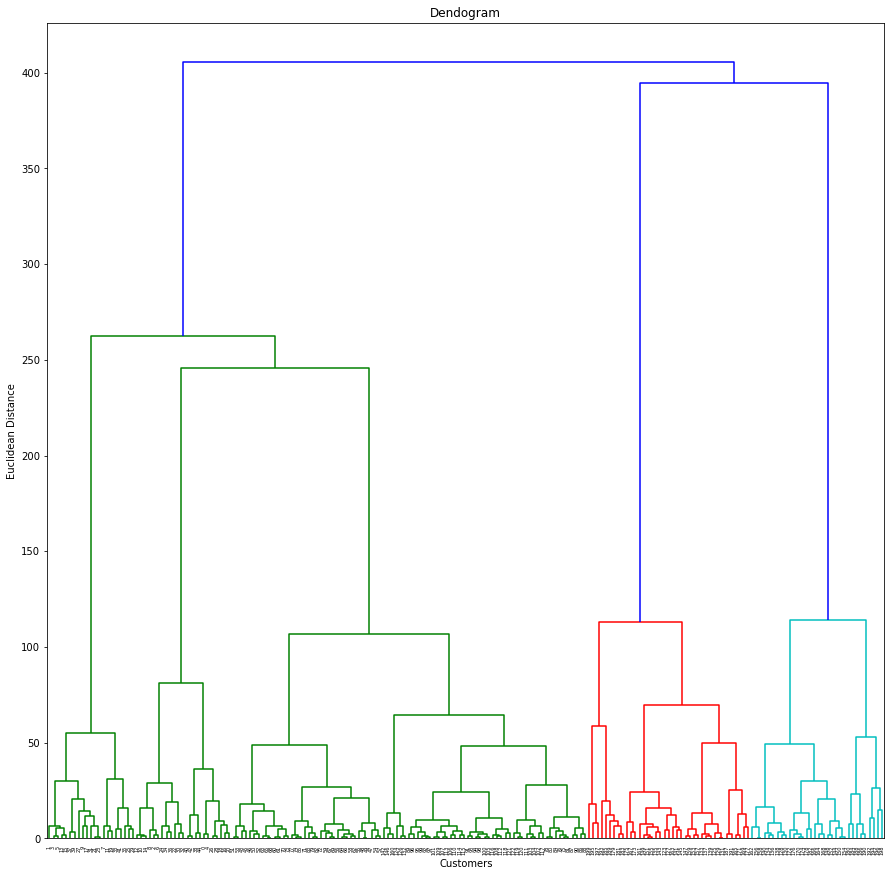

In [47]:
plt.rcParams['figure.figsize'] = (15,15)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

#### The largest gain in euclidean distance are the blue lines on the right. A perpendicular line through this largest gain line passes through a maximum of 5 clusters, i.e. 5 is the required number of clusters

In [49]:
from sklearn.cluster import AgglomerativeClustering
classifer = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = classifer.fit_predict(X)

In [50]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

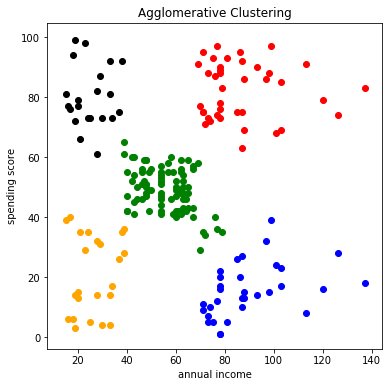

In [52]:
plt.rcParams['figure.figsize'] = (6,6)
plt.scatter(X[y_pred==0][:, 0], X[y_pred==0][:, 1], color='blue')
plt.scatter(X[y_pred==1][:, 0], X[y_pred==1][:, 1], color='green')
plt.scatter(X[y_pred==2][:, 0], X[y_pred==2][:, 1], color='red')
plt.scatter(X[y_pred==3][:, 0], X[y_pred==3][:, 1], color='black')
plt.scatter(X[y_pred==4][:, 0], X[y_pred==4][:, 1], color='orange')
plt.title('Agglomerative Clustering')
plt.xlabel('annual income')
plt.ylabel('spending score')